In [7]:
import pickle
from collections import Counter
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from DataObjs import Corpus, success_transform, confidence_transform

In [3]:
with open('../data_regression.p') as handle:
    raw_data = pickle.load(handle)
    
# length, lex, form -> all, p, e

# data point = (sccss_str, conf_str, ([], [], []), ([], [], []), ([], [], []))     
    
# nonoise
data_en = Corpus(raw_data[1], succs_map=success_transform, conf_map=confidence_transform)
# FTT
data_de = Corpus(raw_data[0], succs_map=success_transform, conf_map=confidence_transform) 

data_all = Corpus(dict(raw_data[0], **raw_data[1]), succs_map=success_transform, conf_map=confidence_transform)

print len(data_en)
print len(data_de)
print len(data_all)
print float(len(data_de))/len(data_all)

49
115
164
0.701219512195


2.01117886179 3.79560674037


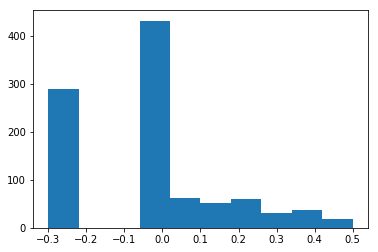

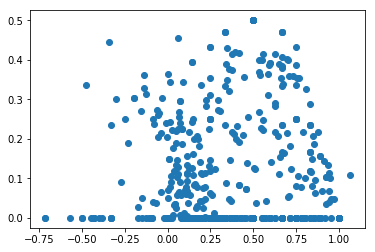

In [76]:
data_vars = [[mv.len_p for mv in data_all.moves],
            [mv.len_e for mv in data_all.moves],
            [mv.lex_p for mv in data_all.moves],
            [mv.lex_e for mv in data_all.moves],
            [mv.form_p for mv in data_all.moves],
            [mv.form_e for mv in data_all.moves]]


print np.mean([len(mv) for var in data_vars for mv in var]), np.var([len(mv) for var in data_vars for mv in var])
#print [np.var(mv)**0.5 for var in data_vars for mv in var]
plt.hist([(np.var(mv)**.5) if len(mv) > 0 else -0.3 for var in data_vars for mv in var])
plt.show()

plt.plot([(np.mean(mv)) if len(mv) > 0 else 0 for var in data_vars for mv in var],
        [(np.var(mv)**.5) if len(mv) > 0 else 0 for var in data_vars for mv in var], 'o')

plt.show()

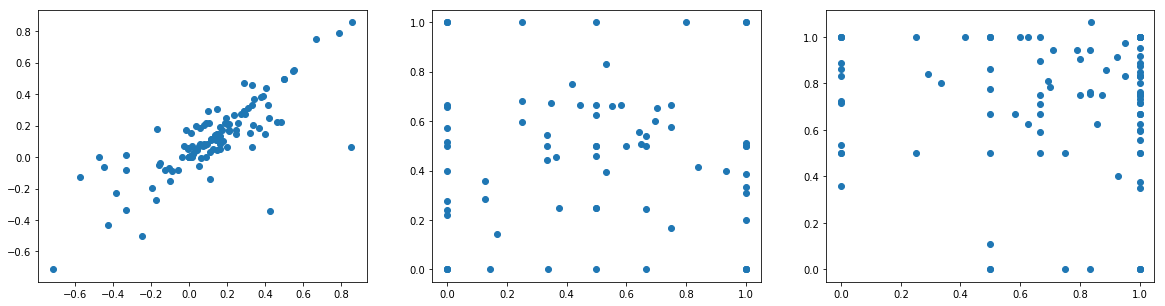

In [37]:
all_len_p = [np.mean(mv.len_p) for mv in data_all.moves]
all_len_e = [np.mean(mv.len_e) for mv in data_all.moves]

all_lex_p = [np.mean(mv.lex_p) for mv in data_all.moves]
all_lex_e = [np.mean(mv.lex_e) for mv in data_all.moves]

all_form_p = [np.mean(mv.form_p) for mv in data_all.moves]
all_form_e = [np.mean(mv.form_e) for mv in data_all.moves]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.plot(all_len_e, all_len_p, 'o')
ax2.plot(all_lex_e, all_lex_p, 'o')
ax3.plot(all_form_e, all_form_p, 'o')
plt.show()